In [14]:
%load_ext autoreload
%autoreload 2
from algo import CEM
import numpy as np
import gym
from gym.spaces import Discrete, Box
# Task settings:
env = gym.make('Acrobot-v0') # Change as needed
num_steps = 500 # maximum length of episode
# Alg settings:
n_iter = 100 # number of iterations of CEM
batch_size = 100 # number of samples per batch
elite_frac = 0.2 # fraction of samples used as elite set

if isinstance(env.action_space, Discrete):
    dim_theta = (env.observation_space.shape[0]+1) * env.action_space.n
elif isinstance(env.action_space, Box):
    dim_theta = (env.observation_space.shape[0]+1) * env.action_space.shape[0]
else:
    raise NotImplementedError

# Initialize mean and standard deviation
theta_mean = np.zeros(dim_theta)
theta_std = np.ones(dim_theta)

reward_list3 = []

# Now, for the algorithm

for iteration in xrange(n_iter):
    # Sample parameter vectors
    thetas = np.random.multivariate_normal(theta_mean,np.diag(theta_std),batch_size)
    rewards = [CEM.noisy_evaluation(theta,env,num_steps) for theta in thetas]
    # Get elite parameters
    n_elite = int(batch_size * elite_frac)
    elite_inds = np.argsort(rewards)[batch_size - n_elite:batch_size]
    elite_thetas = [thetas[i] for i in elite_inds]
    # Update theta_mean, theta_std
    
    theta_mean = np.mean(elite_thetas,axis=0)
    theta_std = np.std(elite_thetas,axis=0)
    reward_list3.append(np.mean(rewards))
    print "iteration %i. mean f: %8.3g. max f: %8.3g"%(iteration, np.mean(rewards), np.max(rewards))
    CEM.do_episode(CEM.make_policy(theta_mean,env), env, num_steps, render=True)

[2016-08-10 17:02:31,016] Making new env: Acrobot-v0


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
iteration 0. mean f:     -421. max f:      -78
iteration 1. mean f:     -315. max f:      -65
iteration 2. mean f:     -210. max f:      -64
iteration 3. mean f:     -176. max f:      -64
iteration 4. mean f:     -118. max f:      -64
iteration 5. mean f:     -117. max f:      -64
iteration 6. mean f:     -111. max f:      -63
iteration 7. mean f:     -104. max f:      -63
iteration 8. mean f:     -113. max f:      -64
iteration 9. mean f:     -102. max f:      -64
iteration 10. mean f:    -88.5. max f:      -63
iteration 11. mean f:    -99.6. max f:      -63
iteration 12. mean f:     -109. max f:      -64
iteration 13. mean f:     -107. max f:      -64
iteration 14. mean f:    -98.8. max f:      -64
iteration 15. mean f:     -103. max f:      -64
iteration 16. mean f:     -101. max f:      -64
iteration 17. mean f:     -102. max f:      -64
iteration 18. mean f:     -109. max f:      -63
iteration 

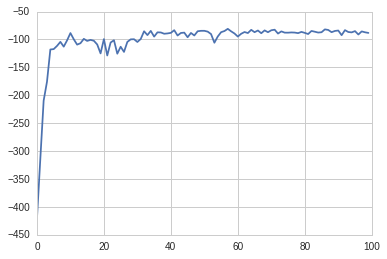

In [15]:
plt.plot(reward_list3)

In [2]:
import seaborn as sns

In [3]:
%matplotlib
%matplotlib inline


Using matplotlib backend: Qt4Agg


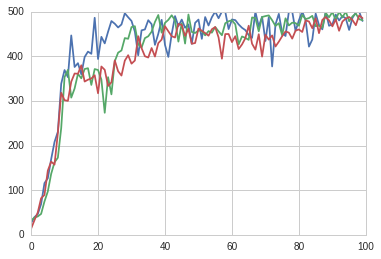

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
plt.plot(reward_list)
plt.plot(reward_list2)
plt.plot(reward_list3)

In [12]:
a = [[1,2,3],[2,3,4]]
np.sum(a,axis=0)

array([3, 5, 7])

In [13]:
np.sum(a,axis=1)

array([6, 9])